#Analysis on CNN/DailyMAil Dataset

In [ ]:
!pip install datasets matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.6 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [ ]:
!pip install datasets matplotlib wordcloud spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 91.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Loading the CNN/DailyMail dataset using huggingface
dataset = load_dataset('cnn_dailymail', '3.0.0')
print(dataset)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/287113 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13368 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11490 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 287113
    })
    validation: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 13368
    })
    test: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 11490
    })
})


In [ ]:
train_data=dataset['train']

In [ ]:
#getting word counts for articles and summaries
train_article_lengths = [len(article.split()) for article in train_data['article']]
train_summary_lengths = [len(summary.split()) for summary in train_data['highlights']]
print(f"Average article length: {np.mean(train_article_lengths):.2f} words")
print(f"Average summary length: {np.mean(train_summary_lengths):.2f} words")
print(f"Median article length: {np.median(train_article_lengths):.2f} words")
print(f"Median summary length: {np.median(train_summary_lengths):.2f} words")

Average article length: 691.87 words
Average summary length: 51.57 words
Median article length: 632.00 words
Median summary length: 48.00 words


Average word count per article: 691.870


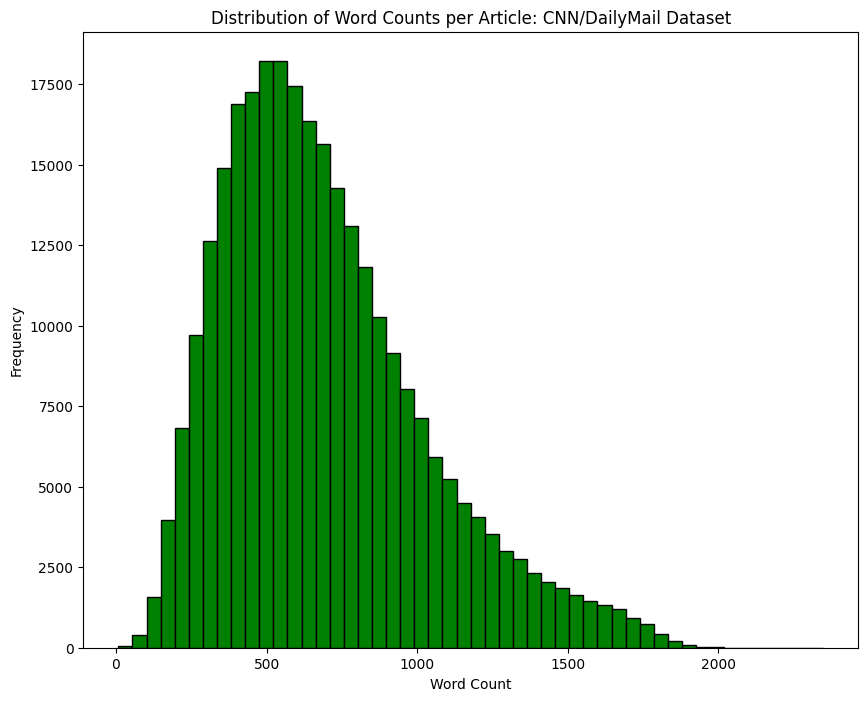

In [ ]:
#counting words in text
def word_count(text):
    return len(text.split())

#extracting the word counts for the articles in the training set
trainind_data_counts=[word_count(article) for article in dataset['train']['article']]

#calculating the average word count
average_word_count=sum(trainind_data_counts) / len(trainind_data_counts)
print(f'Average word count per article: {average_word_count:.3f}')

#plot
plt.figure(figsize=(10, 8))
plt.hist(trainind_data_counts, bins=50, color='green', edgecolor='black')
plt.title('Distribution of Word Counts per Article: CNN/DailyMail Dataset')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

Named Entity Types and Their Frequencies in CNN/Dailymail Dataset:
Counter({'PERSON': 10, 'CARDINAL': 8, 'DATE': 7, 'GPE': 5, 'ORG': 4, 'WORK_OF_ART': 3, 'MONEY': 2, 'NORP': 2, 'QUANTITY': 1, 'ORDINAL': 1, 'LOC': 1})


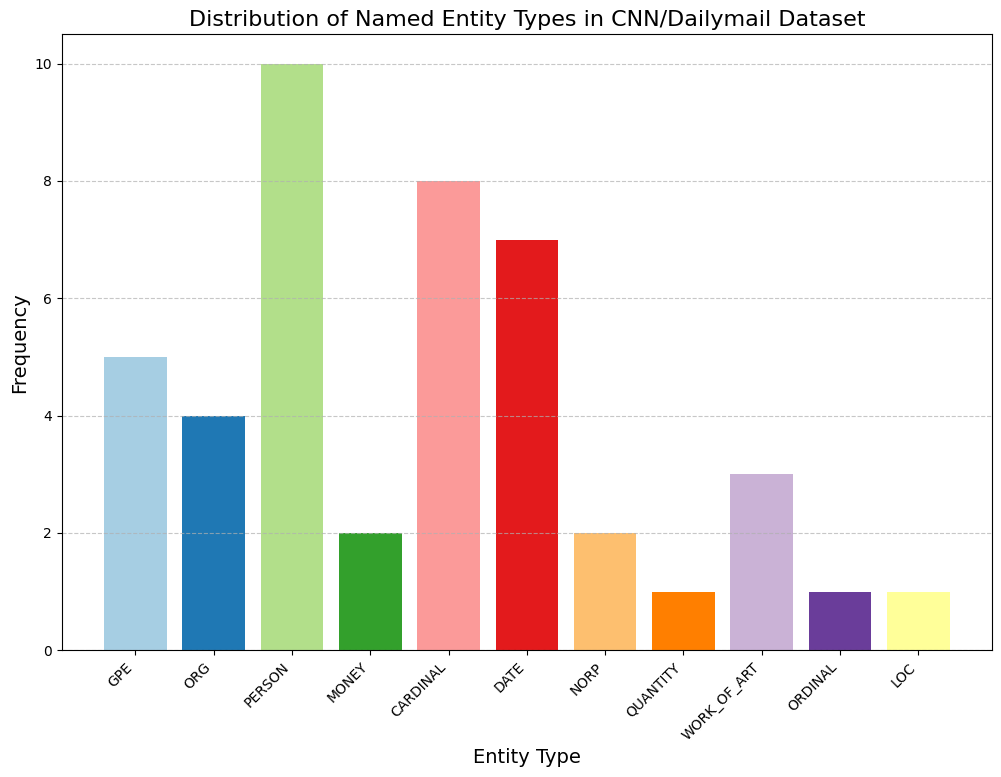

In [ ]:
import spacy
import matplotlib.pyplot as plt
from collections import Counter
from collections import Counter
nlp = spacy.load('en_core_web_sm')
#performing NER on article
rec_article =train_data['article'][0]
doc =nlp(rec_article)

#extracting and count entity types
entity_types= [ent.label_ for ent in doc.ents]
entity_freq =Counter(entity_types)
print(f"Named Entity Types and Their Frequencies in CNN/Dailymail Dataset:\n{entity_freq}")
#plot the distribution of named entities
colors=plt.cm.Paired(range(len(entity_freq)))

plt.figure(figsize=(12, 8))
plt.bar(entity_freq.keys(), entity_freq.values(), color=colors)
plt.title('Distribution of Named Entity Types in CNN/Dailymail Dataset', fontsize=16)
plt.xlabel('Entity Type', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
import pandas as pd
df = pd.DataFrame(train_data)
print("First five rows of the dataset:")
df.head()

First five rows of the dataset:


,article,highlights,id
0,"LONDON, England (Reuters) -- Harry Potter star...",Harry Potter star Daniel Radcliffe gets £20M f...,42c027e4ff9730fbb3de84c1af0d2c506e41c3e4
1,Editor's note: In our Behind the Scenes series...,Mentally ill inmates in Miami are housed on th...,ee8871b15c50d0db17b0179a6d2beab35065f1e9
2,"MINNEAPOLIS, Minnesota (CNN) -- Drivers who we...","NEW: ""I thought I was going to die,"" driver sa...",06352019a19ae31e527f37f7571c6dd7f0c5da37
3,WASHINGTON (CNN) -- Doctors removed five small...,"Five small polyps found during procedure; ""non...",24521a2abb2e1f5e34e6824e0f9e56904a2b0e88
4,(CNN) -- The National Football League has ind...,"NEW: NFL chief, Atlanta Falcons owner critical...",7fe70cc8b12fab2d0a258fababf7d9c6b5e1262a


In [ ]:
print("\nBasic statistics:")
df.describe()


Basic statistics:


,article,highlights,id
count,287113,287113,287113
unique,284005,282197,287113
top,"SHANGHAI, China (CNN) -- If it weren't for th...",This page includes the show Transcript and the...,42c027e4ff9730fbb3de84c1af0d2c506e41c3e4
freq,3,83,1


Average word count per article: 51.574


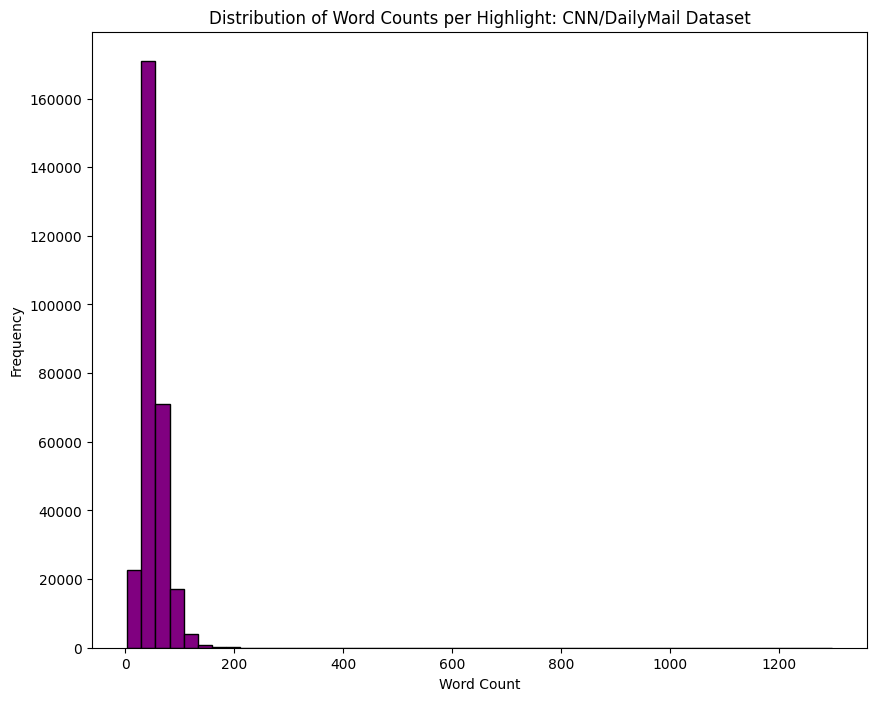

In [ ]:
#counting words in text
def word_count(text):
    return len(text.split())

#extracting the word counts for the articles in the training set
trainind_data_counts = [word_count(article) for article in dataset['train']['highlights']]

#calculating the average word count
average_word_count = sum(trainind_data_counts) / len(trainind_data_counts)
print(f'Average word count per article: {average_word_count:.3f}')

#plottiyng distribution of word counts
plt.figure(figsize=(10, 8))
plt.hist(trainind_data_counts, bins=50, color='yellow', edgecolor='black')
plt.title('Distribution of Word Counts per Highlights: CNN/DailyMail Dataset')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import platform
import psutil
import sys
import os

#system information
system = platform.system()
release = platform.release()
version = platform.version()
architecture = platform.architecture()
processor = platform.processor()
python_version = platform.python_version()
machine = platform.machine()
memory = psutil.virtual_memory()
cpu_count = psutil.cpu_count(logical=True)
kernel_version = os.uname()

installed_packages = !pip list
print(f"System: {system}")
print(f"Release: {release}")
print(f"Version: {version}")
print(f"Kernel Version: {kernel_version.sysname} {kernel_version.release}")
print(f"Architecture: {architecture[0]}")
print(f"Processor: {processor}")
print(f"Python Version: {python_version}")
print(f"Machine: {machine}")
print(f"Total Memory: {memory.total / (1024 ** 3):.2f} GB")
print(f"Available Memory: {memory.available / (1024 ** 3):.2f} GB")
print(f"CPU Count: {cpu_count}")


System: Linux
Release: 6.1.85+
Version: #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
Kernel Version: Linux 6.1.85+
Architecture: 64bit
Processor: x86_64
Python Version: 3.10.12
Machine: x86_64
Total Memory: 50.99 GB
Available Memory: 45.42 GB
CPU Count: 8
